In [34]:
import pandas as pd
import numpy as np

In [35]:
# Levanto Archivo
properati = pd.read_csv('C:/Users/nw_nf/Desktop/properati.csv')

In [36]:
#Dropeo Columnas que no sirven
properati_red=properati.drop(['operation','geonames_id','image_thumbnail','Unnamed: 0'], axis=1)
properati_red.head(3)

,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


In [37]:
#Creo nuevo DF para serparar 'place_with_parent_names'
column_names = ['nada','Pais', 'provincia','localidad','otro','otro1','otro2']
A = pd.DataFrame(columns = column_names )

In [38]:
# Separo las columnas en el nuevo DF
A[column_names]= properati_red['place_with_parent_names'].str.split(pat= '|', expand=True)

In [39]:
A.head(10)

,nada,Pais,provincia,localidad,otro,otro1,otro2
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None
5,,Argentina,Entre Ríos,Gualeguaychú,,None,None
6,,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,,None
7,,Argentina,Capital Federal,Belgrano,,None,None
8,,Argentina,Capital Federal,Belgrano,,None,None
9,,Argentina,Santa Fe,Rosario,,None,None


In [40]:
#Esta separdo por provincia y BS AS en 4 (Norte, sur, oeste, Atlantica)
A['provincia'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [41]:
#Esta separdo por provincia y BS AS en 4 (Norte, sur, oeste, Atlantica)
A['localidad'].value_counts()

Tigre            8983
Rosario          8504
Mar del Plata    7710
Córdoba          6606
                 4780
                 ... 
Pedro Molina        1
Las Talitas         1
Tilisarao           1
Laprida             1
Villa Unión         1
Name: localidad, Length: 539, dtype: int64

In [42]:
#Chequeo Nulos
A.isnull().sum()/A.shape[0]
#Otros no son usables, el 3 esta vacio

nada         0.000000
Pais         0.000000
provincia    0.000000
localidad    0.000000
otro         0.039432
otro1        0.666392
otro2        0.995479
dtype: float64

In [43]:
#Chequeo si son iguales la provincia
properati_red['provincia'] = A['provincia']
(properati_red['provincia'] == properati_red['state_name']).value_counts()
#Asi que es lo mismo usar cualquier dropeo

True    121220
dtype: int64

In [44]:
zonas =  {'Capital Federal': 'cabaygba',
           'Bs.As. G.B.A. Zona Norte': 'cabaygba',
           'Bs.As. G.B.A. Zona Sur': 'cabaygba',
           'Bs.As. G.B.A. Zona Oeste': 'cabaygba',
           'Córdoba': 'centro',
           'Santa Fe': 'centro',
           'Buenos Aires Costa Atlántica': 'centro',
         'Buenos Aires Interior':'centro',
         'Neuquén': 'sur',
         'Mendoza': 'centro',
         'Tucumán': 'norte',
         'Corrientes' : 'norte',
         'Misiones': 'norte',
         'Entre Ríos': 'norte',
         'Salta':'norte',
         'Chubut': 'sur',
        'San Luis': 'centro',
          'La Pampa': 'centro',
         'Formosa':'norte',
         'Chaco': 'norte',
         'San Juan':'centro',
         'Tierra Del Fuego': 'sur',
          'Catamarca': 'norte',
          'Jujuy': 'norte',
          'Santa Cruz': 'sur',
          'La Rioja': 'norte',
          'Santiago Del Estero': 'norte',
          'Río Negro':'sur'
         }

In [45]:
properati_red["zonas"] = properati_red["provincia"].map(zonas)

In [46]:
properati_red["zonas"].isnull().sum()

0

In [47]:
#Chequeo si son iguales localidades
#copio al otro DF
properati_red['localidad2'] = A['localidad']
#Chequeo si son iguales la localidad
(properati_red['localidad2'] == properati_red['place_name']).value_counts()
#Son diferentes

True     86027
False    35193
dtype: int64

In [48]:
properati_red[['place_name','localidad2']].head(20)
#localidad2 parece mas descriptiva, ejemplo fila 4! Centro vs Mar del plata

,place_name,localidad2
0,Mataderos,Mataderos
1,La Plata,La Plata
2,Mataderos,Mataderos
3,Liniers,Liniers
4,Centro,Mar del Plata
5,Gualeguaychú,Gualeguaychú
6,Munro,Vicente López
7,Belgrano,Belgrano
8,Belgrano,Belgrano
9,Rosario,Rosario


In [49]:
#Simplifico localidades con menos de 5 casos
localidad_counts = properati_red['localidad2'].value_counts()
localidad_1mask= localidad_counts  == 1
localidad_2mask= localidad_counts  == 2
localidad_3mask= localidad_counts  == 3
localidad_4mask= localidad_counts  == 4

loccon1 = localidad_counts.loc[localidad_1mask]
loccon2 = localidad_counts.loc[localidad_2mask]
loccon3 = localidad_counts.loc[localidad_3mask]
loccon4 = localidad_counts.loc[localidad_4mask]
print(len(localidad_counts))
print(len(loccon1))
print(len(loccon2))
print(len(loccon3))
print(len(loccon4))

539
134
56
28
21


In [50]:
localidades_agru = properati_red.replace(loccon1 .index, "localidad_Unica")
localidades_agru = localidades_agru.replace(loccon2 .index, "localidad_Unica")
localidades_agru = localidades_agru.replace(loccon3 .index, "localidad_Unica")
localidades_agru = localidades_agru.replace(loccon4 .index, "localidad_Unica")
localidades_agru['localidad2'].value_counts()

Tigre                 8983
Rosario               8504
Mar del Plata         7710
Córdoba               6606
                      4780
                      ... 
Federación               5
Oliva                    5
Cerro Azul               5
San Jerónimo Norte       5
La Paz                   5
Name: localidad2, Length: 301, dtype: int64

In [51]:
localidades_agru.head(5)

,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,provincia,zonas,localidad2
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,cabaygba,Mataderos
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,cabaygba,La Plata
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,cabaygba,Mataderos
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Capital Federal,cabaygba,Liniers
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,centro,Mar del Plata


In [52]:
#Dropeo las columnas que no sirven mas
localidades_agru=localidades_agru.drop(['place_name','place_with_parent_names','country_name','state_name','properati_url'], axis=1)
localidades_agru.head(3)

,property_type,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,provincia,zonas,localidad2
0,PH,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,cabaygba,Mataderos
1,apartment,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,cabaygba,La Plata
2,apartment,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,cabaygba,Mataderos


In [53]:
localidades_agru.shape

(121220, 20)

In [61]:
A = localidades_agru.groupby('zonas')
round(A['price_usd_per_m2'].mean(),0).sort_values()

zonas
norte       1324.0
centro      1607.0
sur         1772.0
cabaygba    2345.0
Name: price_usd_per_m2, dtype: float64

In [62]:
B = localidades_agru.groupby('localidad2')
B['price_usd_per_m2'].mean().sort_values()

localidad2
Zárate                        18.873701
Coronda                       76.771599
La Granja                     77.089115
Baradero                      94.743668
Potrero de Garay             104.172278
                                ...    
San Jerónimo Norte                  NaN
San José del Rincón                 NaN
San Juan                            NaN
Santa Rosa de Calamuchita           NaN
Valle Hermoso                       NaN
Name: price_usd_per_m2, Length: 301, dtype: float64

(0, 6000)

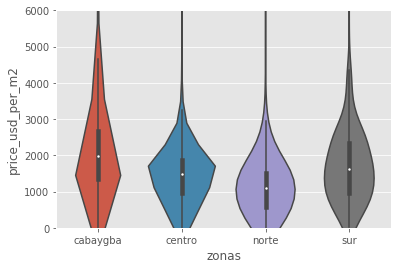

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
A=sb.violinplot(localidades_agru['zonas'],localidades_agru['price_usd_per_m2']) 
plt.ylim(0, 6000)



(0, 6000)

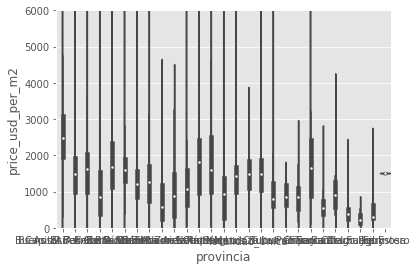

In [74]:
B=sb.violinplot(localidades_agru['provincia'],localidades_agru['price_usd_per_m2']) 
plt.ylim(0, 6000)